# Análisis de empleos en IA y Data Science (2025)

---

> **⚠️ Aviso**: Este dataset fue recolectado con fines educativos y de investigación. Los datos provienen de ofertas públicas de empleo y no están afiliados ni respaldados por ningún portal o empresa. Toda la recolección se realizó respetando los principios de uso justo (fair use).

---

## Contexto del Negocio

El mercado laboral en **inteligencia artificial** y **ciencia de datos** está creciendo de forma acelerada. Cada vez más empresas, desde tecnológicas hasta sectores tradicionales, compiten por captar talento cualificado en estas áreas clave.  
Comprender cómo se comporta este mercado es esencial tanto para empleadores como para profesionales que quieren posicionarse mejor.

---

## Objetivo del Análisis

Este análisis busca explorar las principales **tendencias y patrones** del mercado laboral en IA y Data Science durante 2025.  
Nos enfocamos en responder preguntas como:

- ¿Qué ubicaciones geográficas concentran más oportunidades?

- ¿Cómo varían los salarios según la experiencia o la ubicación?

- ¿Qué habilidades técnicas son más demandadas?

- ¿Qué empresas lideran la contratación en IA y Data Science?

- ¿Qué compañías o sectores ofrecen los salarios más competitivos?

- ¿Qué roles específicos dentro del ámbito de IA y Data Science son mejor remunerados?


Durante el proceso, también surgió la necesidad de abordar valores ausentes en variables clave, lo que motivó el uso de técnicas de **modelado predictivo** para imputación, enriqueciendo el análisis y permitiendo una exploración más completa de los datos.

Al final, se espera obtener una visión clara que permita **entender dónde y cómo posicionarse** en el mercado laboral actual, así como **comprender los factores que influyen en la oferta y demanda** dentro de este campo tan competitivo.

---


#### Índice de Contenidos

🔹Importación de librerías

🔹Carga de datos

🔹Análisis exploratorio de datos (EDA)

🔹Preparación de datos

🔹Modelado predictivo (imputación predictiva)

🔹Representación gráfica

🔹Interpretación de resultados

🔹Conclusiones

🔹Referencias

> NOTA: Todos los gráfico, excepto el de residuos, tienen más o menos interactividad. Sientete libre de explorar la información adicional que guardan

In [ ]:
# 📦 Installing additional libraries required for analysis
# - rapidfuzz: fuzzy matching to group similar company names
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 7.2 MB/s eta 0:00:00


## Importación de librerias



In [39]:
# Analysis and visualization libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rapidfuzz import fuzz, process
import re

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

# Global styles and aesthetics for plots

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.dpi'] = 150
plt.style.use('ggplot')
plt.rcParams['font.size'] = 12


# Global configuration for Plotly

default_layout = dict(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    margin=dict(t=60, b=40, l=40, r=20)
)

def apply_default_layout(fig):
    """
    Applies a default layout style to a Plotly figure for consistent visuals.
    """
    fig.update_layout(**default_layout)
    return fig

# Modeling

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


## Carga del Dataset y exploración inicial

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 700+ JOBs Data of AI & Data Fields .csv to 700+ JOBs Data of AI & Data Fields .csv


In [ ]:
df = pd.read_csv('700+ JOBs Data of AI & Data Fields .csv')

In [ ]:
df.head()

,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/1096352489054...
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               735 non-null    object 
 1   rating                735 non-null    float64
 2   location              735 non-null    object 
 3   positionName          735 non-null    object 
 4   description           735 non-null    object 
 5   salary                506 non-null    object 
 6   url                   735 non-null    object 
 7   jobType/0             501 non-null    object 
 8   jobType/1             19 non-null     object 
 9   jobType/2             1 non-null      object 
 10  jobType/3             1 non-null      object 
 11  searchInput/country   735 non-null    object 
 12  searchInput/position  735 non-null    object 
 13  externalApplyLink     553 non-null    object 
dtypes: float64(1), object(13)
memory usage: 80.5+ KB


In [ ]:
df.isnull().sum()

,0
company,0
rating,0
location,0
positionName,0
description,0
salary,229
url,0
jobType/0,234
jobType/1,716
jobType/2,734


In [ ]:
null_values_percentage = df.isna().mean() * 100
null_values_percentage.sort_values(ascending=False)

,0
jobType/3,99.863946
jobType/2,99.863946
jobType/1,97.414966
jobType/0,31.836735
salary,31.156463
externalApplyLink,24.761905
description,0.000000
positionName,0.000000
location,0.000000
rating,0.000000


In [ ]:
df.nunique()

,0
company,427
rating,29
location,321
positionName,550
description,711
salary,385
url,735
jobType/0,6
jobType/1,4
jobType/2,1


### Observaciones iniciales

+ Se ha detectado un altísimo porcentaje de valores nulos en las columnas `jobType/3`, `jobType/2` y `jobType/1` (entre 97% y 99%). Dado que esta proporción hace inviable su uso sin introducir un sesgo grave, Voy a optar por eliminarlas del análisis.

+ La columna `jobType/0` presenta un 32% de valores nulos, pero a diferencia de las anteriores, su contenido que se refiere al tipo de jornada laboral se considera relevante para el análisis posterior. Por tanto, se diseña una estrategia para su imputación:

  + Primero crearé una tabla de frecuencias relativas del tipo de jornada por puesto (positionName), con el objetivo de identificar relaciones dominantes.

  + luego seleccionaré aquellos puestos cuya jornada más frecuente representa al menos un 70% de los casos conocidos (criterio de jornada dominante).

  + A continuación y solo en esos casos se realizará la imputación, asignando esa jornada dominante a los registros con valor nulo. Con esta decisión busco minimizar el sesgo introducido por imputación automática, restringiéndola a situaciones con alta certeza contextual.

  + El resto de los valores nulos que no cumplan la condición jornada dominante clara se imputaran con la etiqueta 'Unknown'.

  + Finalmente, se verificará que no quedan valores nulos en la columna jobType/0.

> Con esta estrategia se busca equilibrar el aprovechamiento de información disponible con un enfoque prudente ante el sesgo, y refuerzar la calidad del dataset resultante para los análisis posteriores.

+ La variable `salary` también es relevante, pero presenta una doble problemática: tiene más del 31% de valores nulos y no son de tipo numérico.
Una inspección visual revela símbolos, texto y formatos inconsistentes como rangos y sueldos por dia, año...
Aqui Se requerirá limpieza y estandarización previa antes de tomar decisiones sobre imputación.
Por ahora, se aplaza la decisión sobre su tratamiento, pendiente de un análisis más profundo.

#### Eliminación de las columnas `jobType/3`, `jobType/2`, `jobType/1`

In [ ]:
df.drop(['jobType/1', 'jobType/2', 'jobType/3'], axis=1, inplace=True)

#### Creación de una copia e imputación de jobType/0 conforme a la estrategia mencionada antes

In [ ]:
df_copy = df.copy()

In [ ]:
jobtype_by_position = (
    df_copy.groupby('positionName')['jobType/0']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

In [ ]:
dominant_jobtypes ={}
threshold = 0.7

for position, row in jobtype_by_position.iterrows():
  top_jobtype = row.idxmax()
  top_freq = row.max()
  if top_freq >= threshold:
    dominant_jobtypes[position] = top_jobtype

In [ ]:
missing = df_copy['jobType/0'].isna()
has_dominant = df_copy['positionName'].isin(dominant_jobtypes.keys())
potential_to_impute = df_copy[missing & has_dominant]

print(f"Total nulos en jobType/0: {missing.sum()}")
print(f"Se pueden imputar de forma segura: {len(potential_to_impute)}")

Total nulos en jobType/0: 234
Se pueden imputar de forma segura: 61


In [ ]:
dominant_series = pd.Series(dominant_jobtypes, name='DominantJobType')
mapped = df_copy['positionName'].map(dominant_series)
df_copy['jobType/0'] = df_copy['jobType/0'].fillna(mapped)


In [ ]:
df_copy['jobType/0'] = df_copy['jobType/0'].fillna('Unknown')

In [ ]:
assert df_copy['jobType/0'].isna().sum() == 0, "Error: todavía quedan valores nulos en jobType/0"


### Procesamiento de la columna `salary`

#### Ya habia mencionado anteriormente la presencia de simbolos y textos en la variable `salary` además de la coexistencia de distintos formatos (sueldos por día, hora o año, además de intervalos).

La estrategia que seguiré con esta variable será la siguiente:

+ Unificaré los intervalos salariales calculando su media

+ Eliminaré símbolos, letras y convertiré todos los valores a formato numérico.

+ Transformaré todos los sueldos a una misma unidad de referencia, utilizando la más frecuente en el dataset para minimizar sesgo. En este caso concreto, la unidad de reerencia mayoritario fué sueldos por día asi que convertí todos los sueldos a valor diario equivalente

+ La imputación de valores ausentes en esta columna es especialmente delicada por su importancia en el análisis. Para evitar introducir ruido, entrenaré un modelo de predicción para imputar los salarios en base a variables como el puesto (positionName) la empresa contratante (company) y el tipo de jornada (jobType/0).

> utilizzaré un Random Forest por su robustez y buena gestión de variables categóricas sin necesidad de one-hot encoding.

> **⚠️ Nota sobre jobType/0**: Dado que había varias jornadas clasificadas como Unknown (además de casos muy poco frecuentes como Permanent, Internship o Temporary), decidí agruparlas bajo la categoría Full-time, que es la mayoritaria. Esta decisión introduce cierto sesgo, pero permite mantener un mayor número de muestras en el modelo y refleja lo que suele ocurrir en la práctica.




In [ ]:
def replace_interval_with_mean(s):
    """
    Replaces salary intervals in the format '$min - $max' with their mean value as a string.
    Leaves NaN values intact and removes dollar signs and commas from numbers.

    Parameters:
        s (str or NaN): Salary string possibly containing an interval.

    Returns:
        str or NaN: Processed salary string with intervals replaced by mean and symbols removed.
    """
    if pd.isna(s):
        return s  # leave NaNs unchanged

    interval_match = re.search(r'\$([\d,]+)\s*-\s*\$([\d,]+)', s)
    if interval_match:
        min_val = int(interval_match.group(1).replace(',', ''))
        max_val = int(interval_match.group(2).replace(',', ''))
        mean_val = (min_val + max_val) // 2
        return re.sub(r'\$[\d,]+\s*-\s*\$[\d,]+', str(mean_val), s)

    s = re.sub(r'\$', '', s)
    s = re.sub(r'(?<=\d),(?=\d)', '', s)  # only commas between digits

    return s

In [ ]:
df_copy['salary_updated'] = df_copy['salary'].apply(replace_interval_with_mean)


In [ ]:
def convert_to_daily_salary(row):
    """
    Convert salary string (per year, hour, or day) to a standardized daily salary.

    Assumes:
    - 260 workdays per year (5 days × 52 weeks).
    - Full-time, contract, temporary, and internship = 8h/day.
    - Part-time = 4h/day.
    - Unknown and permanent job types are treated as full-time.
    """
    salary = row['salary_updated']
    job_type = row['jobType/0']

    if pd.isna(salary):
        return np.nan

    salary = str(salary).lower()
    job_type = str(job_type).lower()

    # Treat 'unknown' and 'permanent' as 'full-time'
    if job_type in ['unknown', 'permanent']:
        job_type = 'full-time'

    # Estimated hours per job type
    hours_per_type = {
        'full-time': 8,
        'part-time': 4,
        'contract': 8,
        'temporary': 8,
        'internship': 8,
    }

    hours = hours_per_type.get(job_type, 8)
    workdays_per_year = 260

    try:
        if 'day' in salary:
            return float(salary.replace('a day', '').strip())

        elif 'hour' in salary:
            hourly_rate = float(salary.replace('an hour', '').replace('a hour', '').strip())
            return hourly_rate * hours

        elif 'year' in salary:
            annual_salary = float(salary.replace('a year', '').strip())
            return annual_salary / workdays_per_year

        else:
            return float(salary)

    except:
        return np.nan


In [ ]:
df_copy['salary_daily'] = df_copy.apply(convert_to_daily_salary, axis=1)


### Modelado predictivo para imputar los nulos de `salary_daily`

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Feature importances:
company_te: 0.5300
positionName_enc: 0.3807
jobType_enc: 0.0893
Validation MAE: 121.99
Validation RMSE: 163.29
Validation R²: 0.3633


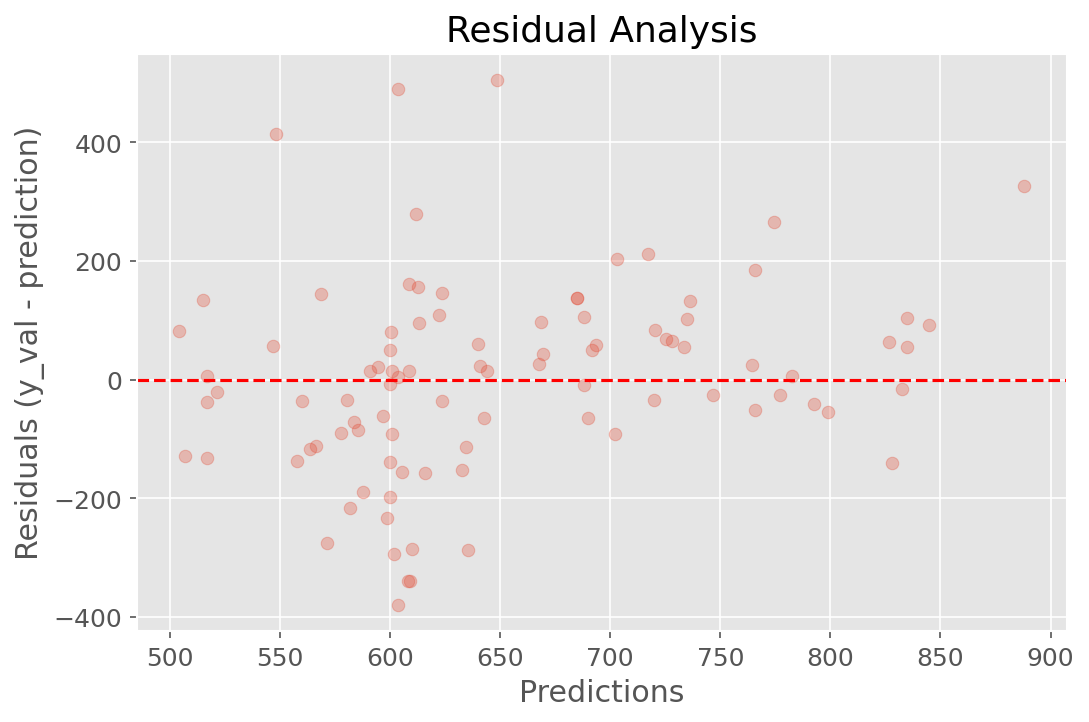

In [ ]:
df = df_copy.copy()

# Split data into known and missing salary for training and prediction
df_train = df[df['salary_daily'].notna()].copy()
df_pred = df[df['salary_daily'].isna()].copy()

features = ['positionName', 'jobType/0', 'company']
target = 'salary_daily'

X_full = df_train[features].copy()
y_full = df_train[target].copy()
X_pred = df_pred[features].copy()

# Ordinal encoding for categorical variables positionName and jobType/0
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_full[['positionName_enc', 'jobType_enc']] = ord_enc.fit_transform(
    X_full[['positionName', 'jobType/0']]
)

X_pred[['positionName_enc', 'jobType_enc']] = ord_enc.transform(
    X_pred[['positionName', 'jobType/0']]
)


class TargetEncoderCV(BaseEstimator, TransformerMixin):
    """
    Target encoding with cross-validation to prevent data leakage.
    Smoothing to avoid overfitting in categories with few samples.
    """
    def __init__(self, n_splits=5, smoothing=10):
        self.n_splits = n_splits
        self.smoothing = smoothing
        self.global_mean = None
        self.target_means_ = {}

    def fit(self, X, y):
       # Calculate the global mean of the target
        self.global_mean = y.mean()

        # Calculate the final means for the prediction set
        # without CV, using the entire training set
        counts = X.value_counts()
        means = y.groupby(X).mean() # Category means
        self.fitted_means_ = (counts * means + self.smoothing * self.global_mean) / (counts + self.smoothing)
        self.fitted_means_ = self.fitted_means_.to_dict() # Convert to dictionary for fast mapping

    def transform(self, X, y=None):
        X_series = pd.Series(X)
        if y is not None:
            kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)
            out = pd.Series(index=X_series.index, dtype=float)
            for train_idx, val_idx in kf.split(X_series):
                train_X, val_X = X_series.iloc[train_idx], X_series.iloc[val_idx]
                train_y = y.iloc[train_idx]
                means = train_y.groupby(train_X).mean()
                counts = train_X.value_counts()
                smooth = (counts * means + self.smoothing * self.global_mean) / (counts + self.smoothing)
                out.iloc[val_idx] = val_X.map(smooth).fillna(self.global_mean)
            return out.values.reshape(-1, 1)
        else:
            counts = X.value_counts()
            means = y_full.groupby(X_full['company']).mean() if y_full is not None else pd.Series(dtype=float)
            smooth = (counts * means + self.smoothing * self.global_mean) / (counts + self.smoothing)
            return X_series.map(self.fitted_means_).fillna(self.global_mean).values.reshape(-1, 1)


# Instantiate and fit TargetEncoderCV
target_encoder_cv = TargetEncoderCV(n_splits=5, smoothing=10)
target_encoder_cv.fit(X_full['company'], y_full)

# Apply target encoding with CV on training set
X_full['company_te'] = target_encoder_cv.transform(X_full['company'], y_full)

# Apply target encoding on prediction set
X_pred['company_te'] = target_encoder_cv.transform(X_pred['company'])

# Final features for training
X_train_final = X_full[['positionName_enc', 'jobType_enc', 'company_te']]
y_train_final = y_full

# Train/validation split for evaluation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_final, y_train_final, test_size=0.2, random_state=42
)

# RandomForest configuration with randomized hyperparameter search
rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 70, 100, 130],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]  # Avoid using 'auto'
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1,
    random_state=42,
    error_score='raise'
)

# Train with internal cross-validation
random_search.fit(X_train, y_train)

features_final = X_train_final.columns
importances = random_search.best_estimator_.feature_importances_

print("Feature importances:")
for f, imp in sorted(zip(features_final, importances), key=lambda x: x[1], reverse=True):
    print(f"{f}: {imp:.4f}")

# Validation performance
y_val_pred = random_search.predict(X_val)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MAE: {mae:.2f}")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R²: {r2:.4f}")

# Impute missing salaries in original DataFrame
X_pred_final = X_pred[['positionName_enc', 'jobType_enc', 'company_te']]
salary_pred = random_search.predict(X_pred_final)
df_copy.loc[df_pred.index, 'salary_daily'] = salary_pred

# Residual analysis
residuals = y_val - y_val_pred
plt.scatter(y_val_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predictions")
plt.ylabel("Residuals (y_val - prediction)")
plt.title("Residual Analysis")
plt.show()


## Evaluación del modelo y notas finales

El modelo Random Forest Regressor alcanzó un `R²` de aproximadamente `0.36` sobre el conjunto de validación, lo que indica que captura solo una parte moderada de la varianza en los salarios a partir de las variables disponibles.

El `gráfico de residuos` muestra cierta dispersión y posibles signos de heterocedasticidad, especialmente en los rangos salariales más altos, donde los errores de predicción son más notorios. Esto sugiere que el modelo puede no generalizar bien para todos los tipos de empleo y posiciones, especialmente cuando faltan variables explicativas clave o no están bien codificadas.

> Parte del margen de error del modelo puede estar influido por las `imputaciones realizadas previamente` en algunas variables categóricas, que podrían haber introducido combinaciones poco realistas o diluido relaciones importantes con el salario.

A pesar de estas limitaciones, el modelo es adecuado para un análisis exploratorio y para una imputación preliminar de valores de salario faltantes. Para predicciones a nivel de producción o análisis más profundos orientados al negocio, se recomendaría mejorar las variables, probar codificaciones alternativas o utilizar modelos más potentes (como gradient boosting o modelos ensamblados).


### Visualización de resultados y análisis gráfico


#### Distribución geográfica de ofertas de trabajo por empresa en EE. UU. (mapa interactivo con plotly)

In [ ]:
# df_copy.groupby(['company', 'location']).size().reset_index(name='num_ofertas').sort_values('num_ofertas', ascending=False)

df_copy[['city', 'state']] = df_copy['location'].str.split(',', expand=True)
df_copy['city'] = df_copy['city'].str.strip()
df_copy['state'] = df_copy['state'].str.strip()

#### Carga de un dataset de ciudades de EE.UU (incluye ciudades, estados al que pertenece, coordenadas de latitud/altitud...)

In [ ]:
uploaded = pd.read_csv("Data/uscities.csv")

Saving uscities.csv to uscities.csv


In [ ]:
us_cities = pd.read_csv('uscities.csv')  # Debe tener 'city', 'state_id', 'lat', 'lng'
us_cities['city'] = us_cities['city'].str.strip()
us_cities['state_id'] = us_cities['state_id'].str.strip()

In [ ]:
df_merged = df_copy.merge(
    us_cities,
    left_on=['city', 'state'],
    right_on=['city', 'state_id'],
    how='left'
)

conteos = df_merged.groupby(['location', 'company', 'lat', 'lng']).size().reset_index(name='num_ofertas')

In [ ]:
fig = px.scatter_geo(
    conteos,
    lat='lat',
    lon='lng',
    color='company',
    size='num_ofertas',
    scope='usa',
    title='Distribución de compañías por ciudad con tamaño según número de ofertas'
)

fig.update_layout(
    legend=dict(
        font=dict(size=12),  # Tamaño de fuente más grande (por defecto suele ser 10)
        bgcolor='rgba(255,255,255,0.7)',
        bordercolor="Black",
        borderwidth=0.5,
        y=0.5,
        x=1.02,
        xanchor='left',
        yanchor='middle',
        itemsizing='constant'
    )
)


fig.show()

#### Instrucciones de interacción con el mapa

+ Haz doble clic sobre una ciudad para aplicar un filtro y enfocarte en ella.

+ Navega por otras ciudades haciendo un solo clic en cada punto.

+ Para restablecer la vista completa, vuelve a hacer doble clic en cualquier punto.

+ Al pasar el cursor sobre los puntos, se muestra información detallada:

  + Nombre de la empresa

  + Número de ofertas publicadas en esa ciudad

  + Latitud y longitud de la ubicación

### Tecnologias más demandadas

In [ ]:
# Lista de tecnologías comunes
tech_aliases = {
    'Python': ['Python'],
    'SQL': ['SQL'],
    'AWS': ['AWS', 'Amazon Web Services'],
    'PyTorch': ['PyTorch'],
    'TensorFlow': ['TensorFlow'],
    'Azure': ['Azure', 'Microsoft Azure'],
    'Tableau': ['Tableau'],
    'Spark': ['Spark'],
    'GCP': ['GCP', 'Google Cloud Platform'],
    'Scikit-learn': ['Scikit-learn', 'sklearn'],
    'Power BI': ['Power BI'],
    'Docker': ['Docker'],
    'Kubernetes': ['Kubernetes'],
    'Git': ['Git'],
    'GitHub': ['GitHub'],
    'Hadoop': ['Hadoop'],
    'MLflow': ['MLflow'],
    'NoSQL': ['NoSQL'],
    'Kafka': ['Kafka'],
    'Databricks': ['Databricks'],
    'Keras': ['Keras'],
    'MongoDB': ['MongoDB'],
    'Pandas': ['Pandas'],
    'Numpy': ['Numpy'],
    'Matplotlib': ['Matplotlib'],
    'Seaborn': ['Seaborn']
}

tech_aliases_counts = {}
for tech_name, aliases in tech_aliases.items():
    pattern = '|'.join([fr'\b{re.escape(alias)}\b' for alias in aliases])
    tech_aliases_counts[tech_name] = df_copy['description'].str.contains(
        pattern, flags=re.IGNORECASE, regex=True
    ).sum()


tech_counts_sorted = dict(sorted(tech_aliases_counts.items(), key=lambda item: item[1], reverse=True))

top_n = 15
tech_counts_top = dict(list(tech_counts_sorted.items())[:top_n])



fig = px.bar(
    x=list(tech_counts_top.keys()),
    y=list(tech_counts_top.values()),
    title='Habilidades técnicas más mencionadas en ofertas',
    labels={'x': 'Tecnología', 'y': 'Número de menciones'}
)
fig = apply_default_layout(fig)

fig.show()

### Distribución del salario diario por empresa

In [ ]:
# Función para limpiar y normalizar nombres de empresa
def limpiar_nombre(nombre):
    nombre = nombre.lower()
    nombre = re.sub(r'[^\w\s]', '', nombre)  # quitar puntuación
    stopwords = ['inc', 'llc', 'ltd', 'corporation', 'services', 'company', 'sa', 's.a', 'the', 'web', 'com']
    palabras = nombre.split()
    palabras = [p for p in palabras if p not in stopwords]
    return ' '.join(palabras).strip()

# Paso 1: obtener las empresas más frecuentes (o todas si prefieres)
empresas = df_copy['company'].value_counts().index.tolist()

# Paso 2: lista base de nombres "canonizados" a los que quieres unificar
nombres_base = ['Amazon', 'Google', 'Meta', 'Apple', 'Microsoft', 'Accenture']

# Preprocesamos los nombres base para matching
nombres_base_limpios = [limpiar_nombre(n) for n in nombres_base]

# Diccionario manual para casos específicos que no se unifican bien automáticamente
dic_manual = {
    'amazon web services inc': 'Amazon',
    'amazoncom': 'Amazon',
    # Añade aquí más si detectas casos similares
}

mapeo_empresas = {}

for empresa in empresas:
    empresa_limpia = limpiar_nombre(empresa)

    # Primero intentar asignación manual
    if empresa_limpia in dic_manual:
        mapeo_empresas[empresa] = dic_manual[empresa_limpia]
        continue

    # Si no está en manual, buscar match automático
    match_limpio, score, _ = process.extractOne(empresa_limpia, nombres_base_limpios, scorer=fuzz.token_set_ratio)
    if score > 80:  # umbral de similitud
        idx = nombres_base_limpios.index(match_limpio)
        mapeo_empresas[empresa] = nombres_base[idx]
    else:
        mapeo_empresas[empresa] = empresa  # dejar original si no hay buena coincidencia

# Paso 4: crear una nueva columna con los nombres normalizados
df_copy['unified_company'] = df_copy['company'].map(mapeo_empresas)

# Filtrar top 10 empresas
top_empresas = df_copy['unified_company'].value_counts().head(10).index

# Copia del dataframe filtrado
df_top_empresas = df_copy[df_copy['unified_company'].isin(top_empresas)].copy()

# Ordenar empresas por mediana de salario
orden_empresas = (
    df_top_empresas.groupby('unified_company')['salary_daily']
    .median()
    .sort_values(ascending=False)
    .index.tolist()
)

# Crear boxplot con orden explícito
fig = px.box(
    df_top_empresas,
    x='unified_company',
    y='salary_daily',
    title='Distribución del salario diario por empresa (Top 10)',
    labels={'unified_company': 'Empresa', 'salary_daily': 'Salario diario estimado'},
    category_orders={'unified_company': orden_empresas}
)

fig.update_layout(xaxis_tickangle=-45)
fig = apply_default_layout(fig)
fig.show()


In [ ]:
top_locations = df_copy['location'].value_counts().head(10)

fig = px.bar(
    x=top_locations.values,
    y=top_locations.index,
    orientation='h',
    labels={'x': 'Número de ofertas', 'y': 'Ubicación'},
    title='Top 10 ubicaciones con más ofertas'
)

fig = apply_default_layout(fig)
fig.show()

## **Insight Global**

### **Contexto del Análisis**:

Este análisis del mercado laboral de **Ciencia de datos e Ingeniería artificial**, partió de una base de datos complicada, que necesitó un cuidadoso preprocesamiento y técnicas avanzadas de imputación para transformar los datos crudos y heterogéneos en una fuente de información útil.

La decisión de modelar la imputación de salarios, utilizando Random Forest con Target Encoding y validación cruzada, y la normalización de los nombres de las empresas son tan sólo resultados del esfuerzo por conseguir una imputación o más cercana posible a la realidad.

Ante todo hay que tener en cuenta que la base de datos de la que se parte, tan solo tiene en cuenta los mercados laborales estadounidenses, de manera que las conclusiones y recomendaciones se basarán en esas ubicaciones.

#### A continuación procedo a redactar las conclusiones obtenidas

#### **Empresas y ubicaciones predominantes**:

Las mejores oportunidades para Científicos de Datos e Ingenieros de IA se agrupan prncipalmente en centros tecnológicos fuertemente consolidados como Nueva York y las principales ciudades de California (San Francisco, Mountain View, Cupertino, Sunnyvale) además de Seattle y Boston que también son focos importantes.

Esto no es de extrañar si tenemos en cuenta la fuerte presencia en esas ciudades de las empresas que más contratan en estos sectores: Amazon, Apple, Meta y Google.

La elevada cantidad de ofertas **Remoto** la creciente flexibilidad geográfica que vivimos aunque dichos puestos estan sujetos a una alta competencia global y mucho más agresiva debido al aumento de potenciales candidatos.

> Si lo que buscas es una mejor posición y barajas la posibilidad de una empresa estadounidense, podría ser útil considerar aumentar tu visibilidad e impacto en este sector, ya sea de manera física o a través de la capacidad probada para colaborar remotamente de manera efectiva, pudiendo ser buenos puntos de partida.

> Considerar la posibilidad de desplazarse puede ampliar las oportunidades en Big Tech y fortalecer tus habilidades de comunicación y autogestión puede ayudarte a sobresalir en roles remotos muy competitivos.

#### **Análisis de habilidades técnicas**:

Sin duda, según reflejan los datos, Python y SQL son las habilidades de cimentación irrefutables, demostrando ser los lenguajes universales para roles en Data Science e IA. Poniendolos aparte, la demanda se inclina fuertemente hacia la computación en la nube (AWS liderando claramente), herramientas de Big Data (Spark) y capacidades de MLOps (Docker, Kubernetes, MLflow). La relevancia de Pandas, NumPy y las librerías de visualización (Matplotlib, Seaborn) confirma la necesidad de un alto dominio del ecosistema Python para el manejo y la exploración de datos.

> Estos datos dan una idea de hacia qué lenguajes convendría orientar el aprendizaje, siempre teniendo en cuenta cuál es tu meta final.
Como dijimos antes Python, SQL son imprescindibles, y parece volverse cada vez más relevante aprender AWS (y sus servicios específicos para ML como SageMaker), así como la orquestación de modelos con Docker y Kubernetes.
Una experiencia práctica en MLflow se ve como una herramienta valiosa para el seguimiento y gestión del ciclo de vida de los modelos. Estas habilidades podrían posicionarte más allá de un perfil estándar, permitiéndote operar en entornos de producción complejos y abordar problemas de ingeniería de IA a gran escala, lo cual podría ser un factor diferencial si se ambiciona llegar alto.

#### **Compensación Salarial**:

El análisis de salarios, construido sobre una imputación cuidadosa y algo permisiva, revela a gigantes tecnológicos como Apple, Meta y Google como los que proporcionan sueldos más altos, Sin embargo el modelo exhibe heterocedasticidad, sugiriendo la existencia de factores no tenidos en cuenta en el dataset actual, como el nivel de senioridad, la especificidad del proyecto o la experiencia en determinados dominios de nichos de IA, son determinantes para los salarios en los rangos más altos.

> Si lo que te interesa es un puesto donde se cobre un alto sueldo, estos datos sugieren que conviene poner el foco en las empresas de élite.
Aun así, los conocimientos deben ir más allá de las habilidades básicas e incluir experiencia en proyectos complejos y de alto impacto.
También parece importante prepararse para negociar salarios de forma firme, respaldando esas demandas con el valor cuantificable que se puede aportar.
Para los salarios más altos, todo indica que el nivel de experiencia y la capacidad para resolver problemas complejos de negocio juegan un papel tan relevante como las habilidades técnicas.


#### **Conclusión Final**

Este análisis revela cómo una correcta limpieza, codificación y unificación de variables categóricas puede mejorar significativamente la calidad de los datos disponibles, permitiendo representar mejor la realidad subyacente. Una exploración cuidadosa de este tipo no solo mejora la interpretabilidad, sino que también sienta las bases para una futura modelización más precisa y útil.

Aún así este análisis tiene cabida de mejoras, entre ellas refinar un poco el modelo pues este mostró un R² moderado y bastantes signos de heterocedasticidad (como se menciono antes), Se dejo porque era una solución bastante eficaz para generar insights iniciales e imputar nulos pero eso no quita que si se afina un poco más puedan conseguirse conclusiones aún más cercanas a la realidad.


> Para mejorar el análisis y enriquecer aún más las posibles conclusiones, se seria interesante investigar la posibilidad de integrar fuentes de datos adicionales, que incluyan variables como la senioridad/nivel del puesto, el tamaño de la empresa (más allá del nombre), la industria específica o tecnologías muy nicho mencionadas en las descripciones. Esto mejoraría drásticamente la precisión del modelo de imputación de salarios y permitiría una segmentación salarial más fina.

> Otra sugerencia seria la de implementar Word2Vec o BERT sobre los títulos y descripciones de los puestos para extraer variables latentes que complementen la codificación categórica, y refuercen el modelo de imputación salarial, especialmente para positionName.

> Las posibilidades de mejora y enriquecimiento son bastates pero con lo hecho en este proyecto se consigue ya una idea bastante cercana a lo que podriamos esperar de los empleos relacionados con la IA en este año y un mapa bastante consistente para poder dibujar un poco mejor el camino hacia nuestras propias metas.



## Referencias

### En esta parte encontrarás las fuentes utilizadas para realizar el análisis en este caso solo el Dataset cogido de kaggle

---

- **Título:** *700+ JOBs Data of AI & Data Fields | 2025*  
- **Autor del dataset:** Prince Khunt
- **Fuente original:** scraping de páginas de ofertas de trabajo de EE.UU  
- **Licencia:** Database Contents License (DbCL) v1.0
- crédito: Dataset obtenido de kaggle

- **Enlace:** [Kaggle Dataset](https://www.kaggle.com/datasets/princekhunt19/700-jobs-data-of-ai-and-data-fields-2025)



